In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from pathlib import Path, PureWindowsPath
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_colwidth', None) #afficher texte entier dans dataframe

In [2]:
current_folder = PureWindowsPath(globals()['_dh'][0]).as_posix()
path_root = "/".join(current_folder.split("/")[:-2]) #remonter au dossier root du projet
os.chdir(path_root)
path = PureWindowsPath(os.getcwd() + "/data/input/data.parquet")
path = path.as_posix() #convertir en path linux (convertir les \\ en /)
corpus = pd.read_parquet(path) #engine="fastparquet"

zeros_subset = corpus.loc[corpus["category_bin"] == 0, :]
ones_subset = corpus.loc[corpus["category_bin"] == 1, :]
number_of_minority_class = len(zeros_subset)
sampled_ones = ones_subset.sample(number_of_minority_class, random_state=42)
print(sampled_ones.shape)
corpus = pd.concat([sampled_ones, zeros_subset], ignore_index=True)
corpus = corpus.sample(frac=1).reset_index(drop=True)
corpus.index = list(range(len(corpus)))
corpus["id"] = corpus.index	#creation de l'id seulement apres equilibrage des classes et melange aleatoire
print(corpus["category_bin"].value_counts())
print(corpus.id.duplicated().any())
print(corpus.index.duplicated().any())
corpus

c:\Users\eupho\OneDrive\Documents\perso\projets\classification_texte_bapteme_philo\sources\tfidf
c:\Users\eupho\OneDrive\Documents\perso\projets\classification_texte_bapteme_philo


In [ ]:
X = corpus["message_preprocessed"]
y = corpus["category"]
# y = corpus["category_bin"]
indices = corpus["id"]
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, indices, test_size=0.33, random_state=42)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# indices_test

In [ ]:
#Dimensions de la matrice
print("corpus.shape =", corpus.shape)
print("X_tfidf.shape =", X_train_tfidf.shape) # = (nb_documents, nb_mots)
print("X_tfidf.type =", type(X_train_tfidf)) # = (nb_documents, nb_mots)
print("X_tfidf :")
print(type(X_train_tfidf))
print(X_train_tfidf)

corpus.shape = (3650, 6)
X_tfidf.shape = (2445, 9636)
X_tfidf.type = <class 'scipy.sparse.csr.csr_matrix'>
X_tfidf :
<class 'scipy.sparse.csr.csr_matrix'>
  (0, 8667)	0.1665366257882402
  (0, 2745)	0.22818483432016903
  (0, 9180)	0.23038309441711954
  (0, 1949)	0.32407315352702576
  (0, 3536)	0.32407315352702576
  (0, 9566)	0.2573188763644377
  (0, 3125)	0.15877947521336255
  (0, 4559)	0.2928431338237237
  (0, 5401)	0.2573188763644377
  (0, 8215)	0.24809178330045886
  (0, 430)	0.2515592933740428
  (0, 8599)	0.41033876858740537
  (0, 4897)	0.3470886035534921
  (1, 4873)	0.17703701591438312
  (1, 479)	0.23861953144497167
  (1, 5086)	0.24602229828826894
  (1, 4991)	0.17917807543225334
  (1, 2244)	0.21911976276134673
  (1, 910)	0.16963424907108587
  (1, 3219)	0.15618298130762479
  (1, 4988)	0.24602229828826894
  (1, 2260)	0.14024686951708806
  (1, 7581)	0.24602229828826894
  (1, 4875)	0.2690173924128975
  (1, 5391)	0.365346801746514
  :	:
  (2444, 2425)	0.09492748982996899
  (2444, 5564)	0

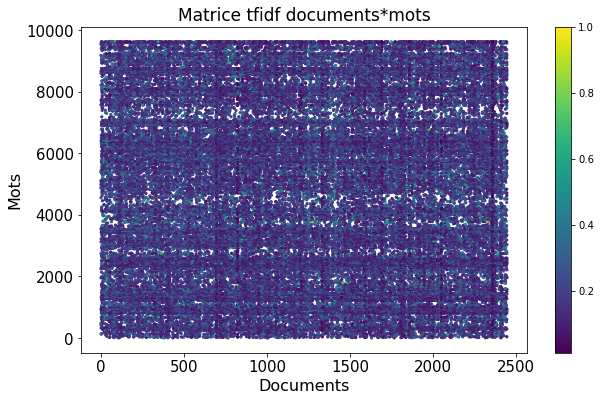

In [ ]:
#Plot 1 de la matrice (avec un scatterplot de matplotlib)
path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_matrix_matplotlib.png")
path = path.as_posix()

X_tfidf_dict = X_train_tfidf.todok()
X_tfidf_xy = np.array(list(X_tfidf_dict.keys()))
X_tfidf_val = np.array(list(X_tfidf_dict.values()))
plt.scatter(X_tfidf_xy[:,0], X_tfidf_xy[:,1], s=5, c=X_tfidf_val)
plt.xlabel("Documents", size=16)
plt.ylabel("Mots", size=16)
plt.title("Matrice tfidf documents*mots", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.colorbar()
plt.rcParams["figure.figsize"] = (12, 8)
plt.savefig(path)
plt.show()

c:\Users\eupho\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


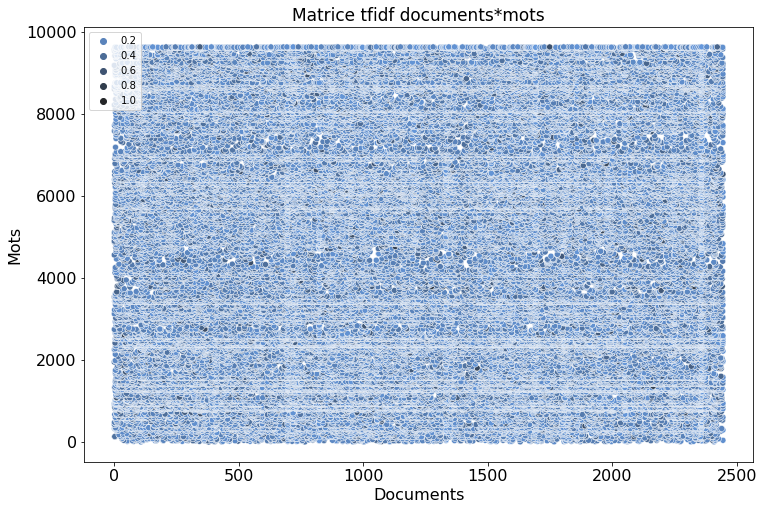

In [ ]:
#Plot 2 de la matrice (avec scatterplot de seaborn)
X_tfidf_dict = X_train_tfidf.todok()
# X_tfidf_dict = X_tfidf[:10000,:].todok()
X_tfidf_xy = np.array(list(X_tfidf_dict.keys()))
X_tfidf_val = np.array(list(X_tfidf_dict.values()))

path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_matrix_seaborn.png")
path = path.as_posix()

sb.scatterplot(x=X_tfidf_xy[:,0], y=X_tfidf_xy[:,1], hue=X_tfidf_val, palette=sb.dark_palette("#69d", reverse=True, as_cmap=True))
plt.xlabel("Documents", size=16)
plt.ylabel("Mots", size=16)
plt.title("Matrice tfidf documents*mots", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (12, 8)
plt.savefig(path)
plt.show()

In [ ]:
# Informations sur la matrice #
# Nombre de valeurs non nulles
print("nombre de valeurs non nulles (taille de la matrice csr) =", X_train_tfidf.count_nonzero())

# Intervalle des valeurs 
print("intervalle des valeurs [{} ; {}]".format(X_train_tfidf.min(), X_train_tfidf.max()))

# Valeurs uniques avec unique()
X_tfidf_unique = np.unique(X_train_tfidf.data)
print("valeurs uniques =", X_tfidf_unique)

# Nombre de valeurs uniques (auquel on additionne 1 pour les 0 qui ne sont pas stockees par definition)
print("nombre de valeurs uniques =", X_tfidf_unique.shape[0] + 1)

nombre de valeurs non nulles (taille de la matrice csr) = 60922
intervalle des valeurs [0.0 ; 1.0]
valeurs uniques = [0.011 0.012 0.014 ... 0.800 0.821 1.000]
nombre de valeurs uniques = 49800


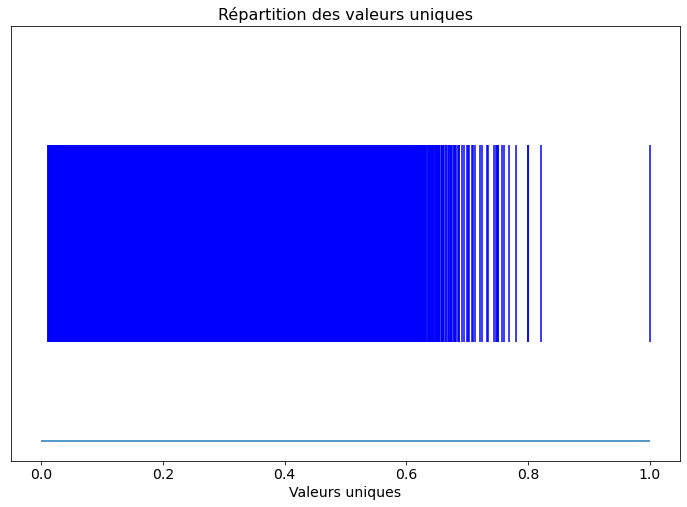

In [ ]:
# Graphique avec barres en 1D des valeurs uniques (pour voir comment elles sont reparties, que a droite ?, que a gauche ?, etc.)
# sb.scatterplot(x=X_tfidf_unique, y=np.zeros_like(X_tfidf_unique), sizes=(10000,10000))
path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_unique_distribution.png")
path = path.as_posix()

plt.figure()
plt.hlines(0,0,1)  # Draw a horizontal line
plt.eventplot(X_tfidf_unique, orientation='horizontal', colors='b')
plt.xlabel("Valeurs uniques", size=14)
plt.title("Répartition des valeurs uniques", size=16)
plt.xticks(fontsize=14)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.rcParams["figure.figsize"] = (9, 4)
plt.savefig(path)
plt.show()

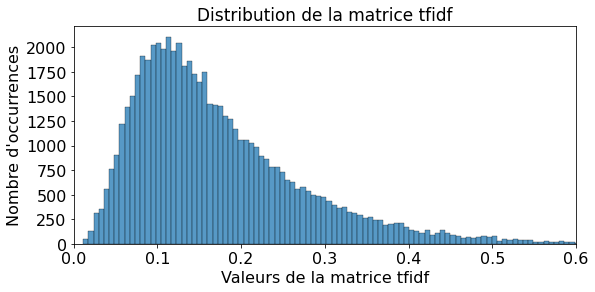

In [ ]:
# Distribution des valeurs
# values, counts = np.unique(X_tfidf.data, return_counts=True)
# value_counts = np.asarray((values, counts)).T

path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_distribution.png")
path = path.as_posix()

sb.histplot(X_train_tfidf.data)
plt.xlabel("Valeurs de la matrice tfidf", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la matrice tfidf", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlim(0, 0.6)
plt.savefig(path)
plt.show()


In [ ]:
# Poids globaux (dans le corpus) des mots tfidf
print("X_train_tfidf.shape =", X_train_tfidf.shape)
n_words = X_train_tfidf.shape[1]
scores_tfidf = pd.DataFrame({"id":range(n_words), "words":tfidf_vectorizer.get_feature_names(), "idf":tfidf_vectorizer.idf_})
scores_tfidf = scores_tfidf.sort_values("idf", ascending=False)
print("moyenne des poids idf =", np.mean(scores_tfidf["idf"]))
print("ecart-type des poids idf =", np.std(scores_tfidf["idf"]))
with pd.option_context("display.max_rows", 100):
    display(scores_tfidf)
# scores_tfidf.to_csv("./data/output/scores_tfidf_train.csv")

X_train_tfidf.shape = (2445, 9636)
moyenne des poids idf = 7.526189701599659
ecart-type des poids idf = 0.874772423456554


c:\Users\eupho\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,id,words,idf
0,0,aaaayaajpgpadqthechildofthecovenantorhowchristianparentsshouldtrainuptheirhouseholds,8.109062
5247,5247,mamelle,8.109062
5269,5269,manifestées,8.109062
5267,5267,manifesté,8.109062
5266,5266,manifesteront,8.109062
...,...,...,...
3428,3428,fait,2.872620
6396,6396,plus,2.810745
9619,9619,être,2.695186
1576,1576,comme,2.690742


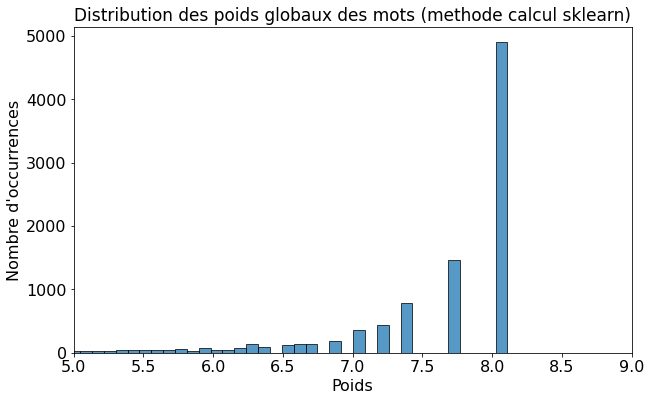

In [ ]:
# Distribution des poids globaux des mots (calcules avec sklearn)
path = PureWindowsPath(os.getcwd() + "\\data\\output\\words_weights_distribution.png")
path = path.as_posix()

sb.histplot(data=scores_tfidf, x="idf")
# plt.yscale('log')
plt.xlabel("Poids", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution des poids globaux des mots (methode calcul sklearn)", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlim(5, 9)
plt.savefig(path)
plt.show()

In [ ]:
# Calcul manuel des poids
print("X_train_tfidf.shape =", X_train_tfidf.shape)
words_weights = X_train_tfidf.sum(axis=0)
print("words_weights.shape =", words_weights.shape)
print(words_weights)
print(words_weights.shape)
words_weights = np.ravel(words_weights)
print(words_weights)
print(words_weights.shape)
# words_weights[:10]
np.set_printoptions(suppress=True)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
np.unique(words_weights).shape
np.max(words_weights)
np.min(words_weights)
print("words_weights.shape =", words_weights.shape)
words_weights

X_train_tfidf.shape = (2445, 9636)
words_weights.shape = (1, 9636)
[[0.286 0.183 0.274 ... 0.112 0.335 0.300]]
(1, 9636)
[0.286 0.183 0.274 ... 0.112 0.335 0.300]
(9636,)
words_weights.shape = (9636,)


array([0.286, 0.183, 0.274, ..., 0.112, 0.335, 0.300])

In [ ]:
# scores_tfidf["manuel_weights"] = words_weights
print("corpus.shape =", corpus.shape)
print("scores_tfidf.shape =", scores_tfidf.shape)
scores_tfidf

corpus.shape = (3650, 6)
scores_tfidf.shape = (9636, 3)


,id,words,idf
0,0,aaaayaajpgpadqthechildofthecovenantorhowchristianparentsshouldtrainuptheirhouseholds,8.109062
5247,5247,mamelle,8.109062
5269,5269,manifestées,8.109062
5267,5267,manifesté,8.109062
5266,5266,manifesteront,8.109062
...,...,...,...
3428,3428,fait,2.872620
6396,6396,plus,2.810745
9619,9619,être,2.695186
1576,1576,comme,2.690742


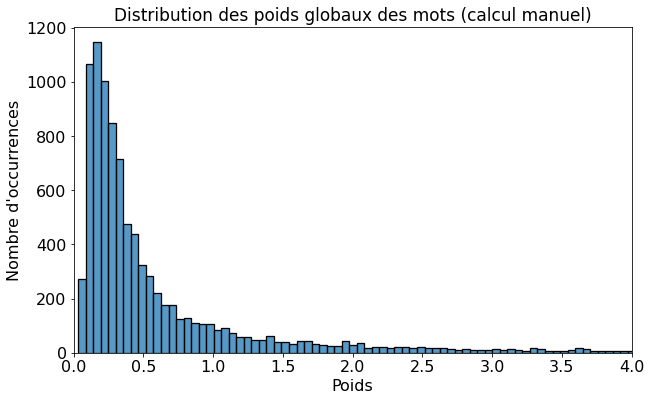

In [ ]:
# Distribution des poids globaux des mots (calcules avec a la main)
# Pour chaque phrase, y a-t-il beaucoup de mots qui ont ete trouves et qui ont influences positivement la prediction ?
path = PureWindowsPath(os.getcwd() + "\\data\\output\\words_weights_distribution_manuel.png")
path = path.as_posix()

# sb.histplot(words_weights[:100000])
sb.histplot(words_weights, edgecolor="black", linewidth=1.3)
# plt.yscale('log')
plt.xlabel("Poids", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution des poids globaux des mots (calcul manuel)", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlim(0, 4)
plt.savefig(path)
plt.show()

In [ ]:
# Calcul des poids locaux des mots (poids des mots pour chaque document)
# Technique : ne plus travailler sur la matrice creuse mais la convertir en numpy array X_train_tfidf.toarray()
# pour travailler dessus
threshold_score = 4.5
col_top_words = [] #liste des top words pour chaque exemple du corpus (partie train)

feature_names = tfidf_vectorizer.get_feature_names_out()
X_train_tfidf_arr = X_train_tfidf.toarray()
idx_vocab = np.argsort(X_train_tfidf_arr, axis=1)
vocab = tfidf_vectorizer.vocabulary_
vocab_inv = {v: k for k, v in vocab.items()}
idx_top_words = idx_vocab[:,-10:]
idx_top_words = np.flip(idx_top_words, axis=1)

col_top_words = []
for idx_row in range(len(idx_top_words)):
    row_matrix_top_words_idx = idx_top_words[idx_row]
    doc_top_words = []
    for idx_word in row_matrix_top_words_idx:
        word = vocab_inv[idx_word]
        score = str(round(X_train_tfidf_arr[idx_row, idx_word], 3))
        doc_top_words.append(word + " (" + score + ")")
    col_top_words.append(doc_top_words)

df_train = pd.DataFrame(X_train_tfidf_arr, columns = feature_names)
df_train["id"] = list(indices_train)
df_train["top_words"] = col_top_words
df_train.sort_values("id", inplace=True)
df_train["message"] = corpus.iloc[indices_train].sort_values("id")["message"].values

display(df_train[["message", "top_words"]])

,message,top_words
2197,"Dans son ouvrage principal, Irénée de Lyon, qui a connu Polycarpe, mentionne en passant le baptême des enfants comme quelque chose qui n’est pas débattu chez les chrétiens[1]. Origène témoigne aussi de l’existence du baptême des enfants comme quelque chose d’indiscuté et dit que l’Église a reçu cela des apôtres[2]. Augustin[3](354-430), Cyprien[4](200-258), Ambroise[5](337-397), Hippolyte[6](170-235) et Chrysostome[7](344-407) témoignent tous à l’unisson de la même réalité.","[quelque (0.24), indiscuté (0.225), débattu (0.214), lyon (0.206), témoigne (0.206), unisson (0.206), hippolyte (0.206), témoignent (0.2), ouvrage (0.195), chrysostome (0.195)]"
931,"Dans une lettre adressée à son ami Samuel Ward, intitulée _Baptismal Regeneration and the Final Perseverance of the Saints_ et datée de 1650, l’évêque anglican John Davenant, qui a assisté en personne au Synode de Dordrecht, discute de la compatibilité entre la doctrine réformée du Synode et la régénération baptismale telle que comprise par Augustin et quelques autres pères.","[synode (0.366), the (0.209), datée (0.206), compatibilité (0.206), perseverance (0.206), dordrecht (0.196), assisté (0.196), intitulée (0.188), ward (0.188), évêque (0.188)]"
1425,"Oui, à la fois parce que Dieu est dans toutes les choses qui constituent un lieu, et que le lieu est défini par les choses dans lequel Dieu est présent.","[lieu (0.515), constituent (0.371), chose (0.336), défini (0.33), présent (0.302), lequel (0.275), dieu (0.222), oui (0.218), toutes (0.212), parce (0.197)]"
1951,"> « Bien que les sacrements des Juifs étaient communs à tous, toutefois la > grâce qui est la vertu des sacrements n’était pas commune ; et, de la même > manière, le bain de la régénération est maintenant commun à tous, mais la > grâce elle-même, par laquelle les membres du Christ sont régénérés avec leur > Chef, n’est pas commune à tous. » > > Augustin, [_Exposition du Psaume 77 > (78)_](http://www.clerus.org/bibliaclerusonline/fr/dpy.htm#dg).","[commune (0.409), commun (0.346), tous (0.316), sacrement (0.301), httpwwwclerusorgbibliaclerusonlinefrdpyhtmdg (0.242), grâce (0.241), exposition (0.2), bain (0.184), vertu (0.178), régénérés (0.172)]"
1429,"Les charismes servent à « manifester la foi et l’enseignement spirituel ». C’est sous cet angle que l’on lit d’ailleurs toutes les manifestations surnaturelles décrites dans les Actes des Apôtres. Or, comme l’enseigne le catéchisme de Heidelberg, il est « notre Souverain Prophète et docteur c’est lui qui nous a pleinement révélé le conseil secret et la volonté de Dieu pour notre rédemption ». Il est donc manifeste que le Christ a dû, comme premier et principal Docteur de la foi, posséder excellemment tous les charismes.","[charisme (0.359), docteur (0.335), excellemment (0.189), surnaturelles (0.189), posséder (0.189), décrites (0.18), manifester (0.173), manifestation (0.173), secret (0.173), révélé (0.173)]"
...,...,...
364,"> Jean Damascène écrit : « Quand nous parlons de la déité, nous ne lui > attribuons pas ce qui est propre à l’humanité; nous ne disons pas que la > déité est passible ou qu’elle peut être créée. » Or la déité, c’est la > nature divine. Donc, ce qui appartient à la nature humaine, ne peut être dit > de la nature divine.","[déité (0.661), nature (0.31), divine (0.24), passible (0.209), attribuons (0.209), créée (0.186), damascène (0.177), appartient (0.177), parlons (0.174), peut (0.17)]"
460,[Geerhardus vos : la notion d’alliance rend la révélation éminemment pratique](http://leboncombat.fr/geerhardus-vos-la-notion-dalliance-rend-la- revelation-eminemment-pratique/) (alliance et révélation),"[notion (0.393), révélation (0.375), rend (0.355), la (0.288), pratiquehttpleboncombatfrgeerhardus (0.252), éminemment (0.252), revelation (0.252), dalliance (0.252), eminemment (0.252), vos (0.239)]"
792,**Est-il vrai de dire : « L’homme a été fait Dieu » ? Non.**,"[vrai (0.495), est (0.376), homme (0.365), il (0.361), dire (0.328